**Thinking about starting your business**

**Goals:**

1. What are the lowest and highest GNI ?

2. What is the range of the majority of score?

3. What is the relationship between the income and the score?

4. What is the correlation between score and other variable?

**Steps:**

1. Importing libraries and loading dataset

2. Inspect the data

3. EDA

4. Conclusion

---



# **0. Importing libraries and loading dataset**

In [70]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/1. Data Science/4. 25-09-2023/Start_a_Business_2019.csv')

# **1. Inspect the data**

In [72]:
# check the dataframe
df

,Location,Region,Starting a Business rank,Starting a Business score,Procedure – Men (number),Time – Men (days),Cost – Men (% of income per capita),Procedure – Women (number),Time – Women (days),Cost – Women (% of income per capita),Paid-in min. capital (% of income per capita),Income Level,GNI
0,New Zealand,Oceania,1,100.0,1,0.5,0.2,1,0.5,0.2,0.0,High income,40820
1,Georgia,Asia,2,99.6,1,1.0,2.1,1,1.0,2.1,0.0,Upper middle income,4130
2,Canada,Americas,3,98.2,2,1.5,0.3,2,1.5,0.3,0.0,High income,44860
3,"Hong Kong SAR, China",Asia,3,98.2,2,1.5,0.5,2,1.5,0.5,0.0,High income,50310
4,Singapore,Asia,3,98.2,2,1.5,0.4,2,1.5,0.4,0.0,High income,58770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Chad,Africa,131,52.5,8,58.0,169.3,8,58.0,169.3,25.3,Low income,670
187,Cambodia,Asia,132,52.4,9,99.0,53.4,9,99.0,53.4,70.2,Lower middle income,1380
188,Somalia,Africa,133,46.0,9,70.0,198.2,9,70.0,198.2,0.0,Low income,454
189,Haiti,Americas,134,36.4,12,97.0,179.7,12,97.0,179.7,11.0,Low income,800


In [73]:
# check the shape of the dataset
df.shape

(191, 13)

*There are 191 rows and 13 columns.*

---



*The avarage score for starting a business is 84.*

---



In [74]:
# check for missing values
df.isnull().sum()

Location                                         0
Region                                           0
Starting a Business rank                         0
Starting a Business score                        0
Procedure – Men (number)                         0
Time – Men (days)                                0
Cost – Men (% of income per capita)              0
Procedure – Women (number)                       0
Time – Women (days)                              0
Cost – Women (% of income per capita)            0
Paid-in min. capital (% of income per capita)    0
Income Level                                     0
GNI                                              0
dtype: int64

*There is no missing value.*

---



In [75]:
# show the data types of each column
df.dtypes

Location                                          object
Region                                            object
Starting a Business rank                           int64
Starting a Business score                        float64
Procedure – Men (number)                           int64
Time – Men (days)                                float64
Cost – Men (% of income per capita)              float64
Procedure – Women (number)                         int64
Time – Women (days)                              float64
Cost – Women (% of income per capita)            float64
Paid-in min. capital (% of income per capita)    float64
Income Level                                      object
GNI                                                int64
dtype: object

In [76]:
# show the summary statistics for Starting a Business score
starting_business_summary = df['Starting a Business score'].describe()
starting_business_summary

count    191.000000
mean      84.366492
std       11.250751
min       25.000000
25%       80.000000
50%       87.000000
75%       92.250000
max      100.000000
Name: Starting a Business score, dtype: float64

In [77]:
# show the summary statistics for every column
df.describe()

,Starting a Business rank,Starting a Business score,Procedure – Men (number),Time – Men (days),Cost – Men (% of income per capita),Procedure – Women (number),Time – Women (days),Cost – Women (% of income per capita),Paid-in min. capital (% of income per capita),GNI
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,62.020942,84.366492,6.602094,19.552356,19.773822,6.712042,19.662304,19.775916,5.424084,14173.141361
std,36.941484,11.250751,2.932360,25.656945,33.731106,2.938996,25.659765,33.731084,17.963215,20720.785968
min,1.000000,25.000000,1.000000,0.500000,0.000000,1.000000,0.500000,0.000000,0.000000,280.000000
25%,31.500000,80.000000,4.000000,7.000000,2.000000,4.500000,7.000000,2.000000,0.000000,1925.000000
50%,57.000000,87.000000,6.000000,12.000000,7.600000,7.000000,12.000000,7.600000,0.000000,5450.000000
75%,90.500000,92.250000,8.000000,21.250000,21.850000,8.500000,21.250000,21.850000,1.850000,16560.000000
max,135.000000,100.000000,20.000000,230.000000,211.800000,20.000000,230.000000,211.800000,179.600000,156283.000000


*The lowest GNI is 280 and the highest is 156,283.*

---



In [78]:
# check what are the different regions this dataset includes
print(df['Region'].unique())

['Oceania' 'Asia' 'Americas' 'Europe' 'Africa']


*There are five different regions being included in the dataset.*

---



In [79]:
# check the the types of income level
print(df['Income Level'].unique())

['High income' 'Upper middle income' 'Lower middle income' 'Low income']


*There are four types of income level.*

---



# **2. EDA**

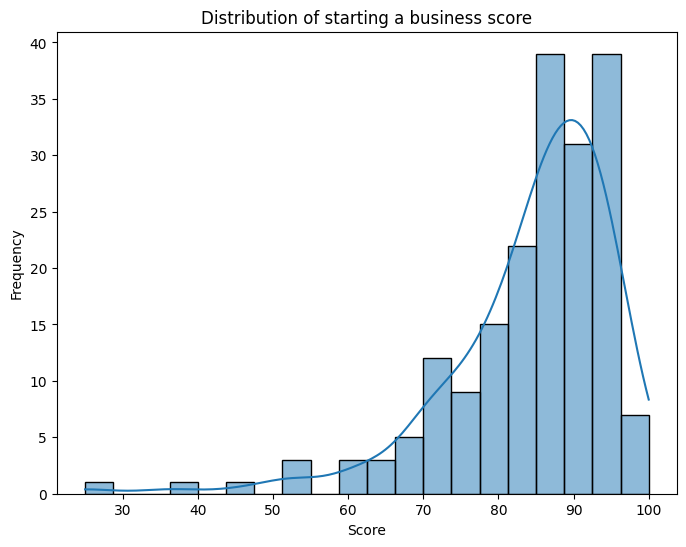

In [80]:
# plot the histogram of starting a business score column
plt.figure(figsize=(8, 6))
sns.histplot(df['Starting a Business score'], bins=20, kde=True)
plt.title('Distribution of starting a business score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

*The majority is between 85 and 95.*

---



In [81]:
# plot the mean of starting a business score by region

# create the sub-dataframe
average_score_by_region = df.groupby('Region')['Starting a Business score'].mean().reset_index().sort_values(ascending=False, by='Starting a Business score')
average_score_by_region

,Region,Starting a Business score
3,Europe,89.142857
2,Asia,86.831250
4,Oceania,84.950000
1,Americas,80.837143
0,Africa,80.618519


In [82]:
# check the highest and lowest
highest_region = average_score_by_region.iloc[0]['Region']
lowest_region = average_score_by_region.iloc[-1]['Region']

highest_region_score = average_score_by_region.iloc[0]['Starting a Business score']
lowest_region_score = average_score_by_region.iloc[-1]['Starting a Business score']

print(f'{highest_region} has the highest average score while {lowest_region} has the lowest which are {highest_region_score} and {lowest_region_score}, respectively.')

Europe has the highest average score while Africa has the lowest which are 89.14285714285714 and 80.61851851851851, respectively.


*Europe has the highest average score while Africa has the lowest which are 89.14285714285714 and 80.61851851851851, respectively.*



---



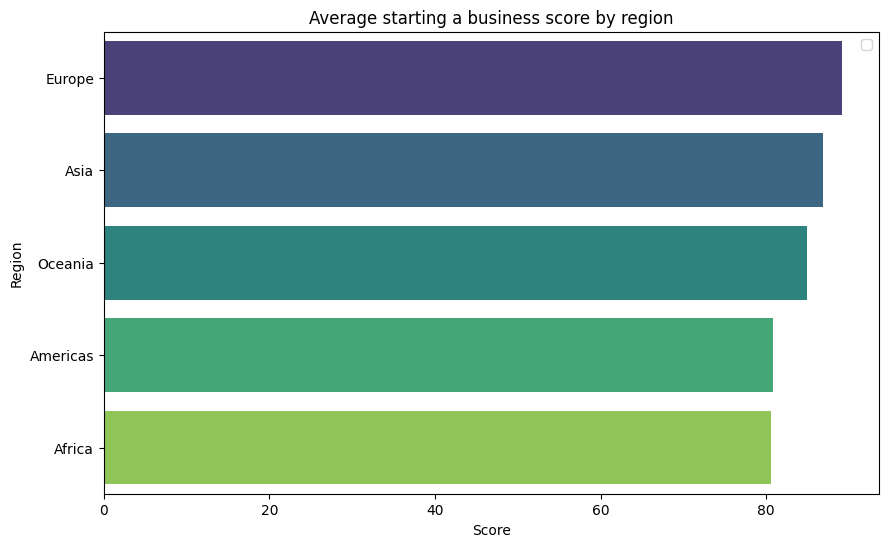

In [83]:
# plot the bar chart of average score in each region
plt.figure(figsize=(10, 6))
sns.barplot(x='Starting a Business score', y='Region', data=average_score_by_region, palette='viridis')
plt.title('Average starting a business score by region')
plt.xlabel('Score')
plt.ylabel('Region')
plt.legend()

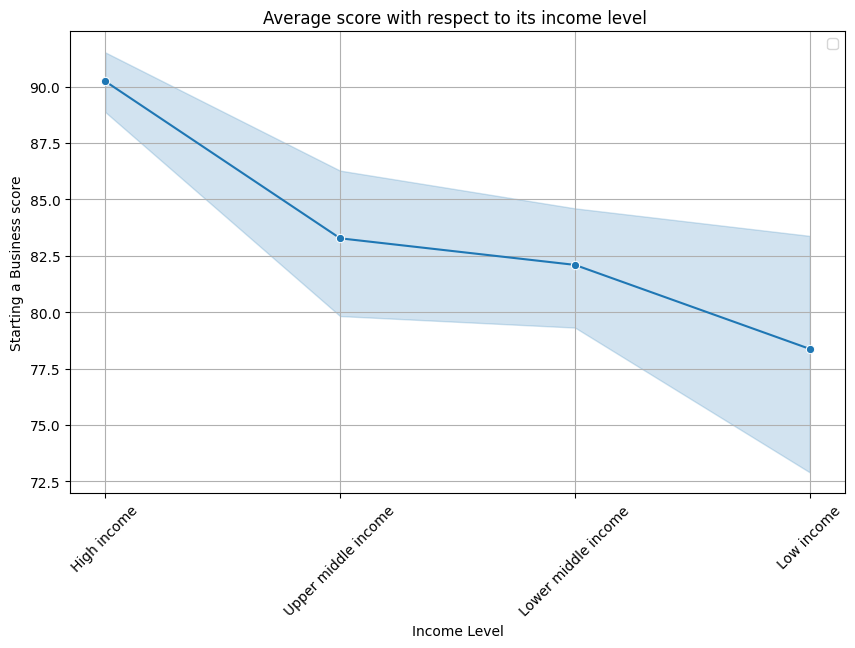

In [84]:
# plot the line of average score with respect to its income level
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Income Level', y='Starting a Business score', marker='o')
plt.title('Average score with respect to its income level ')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

*The higher the income, the higher the starting a business score is.*

---



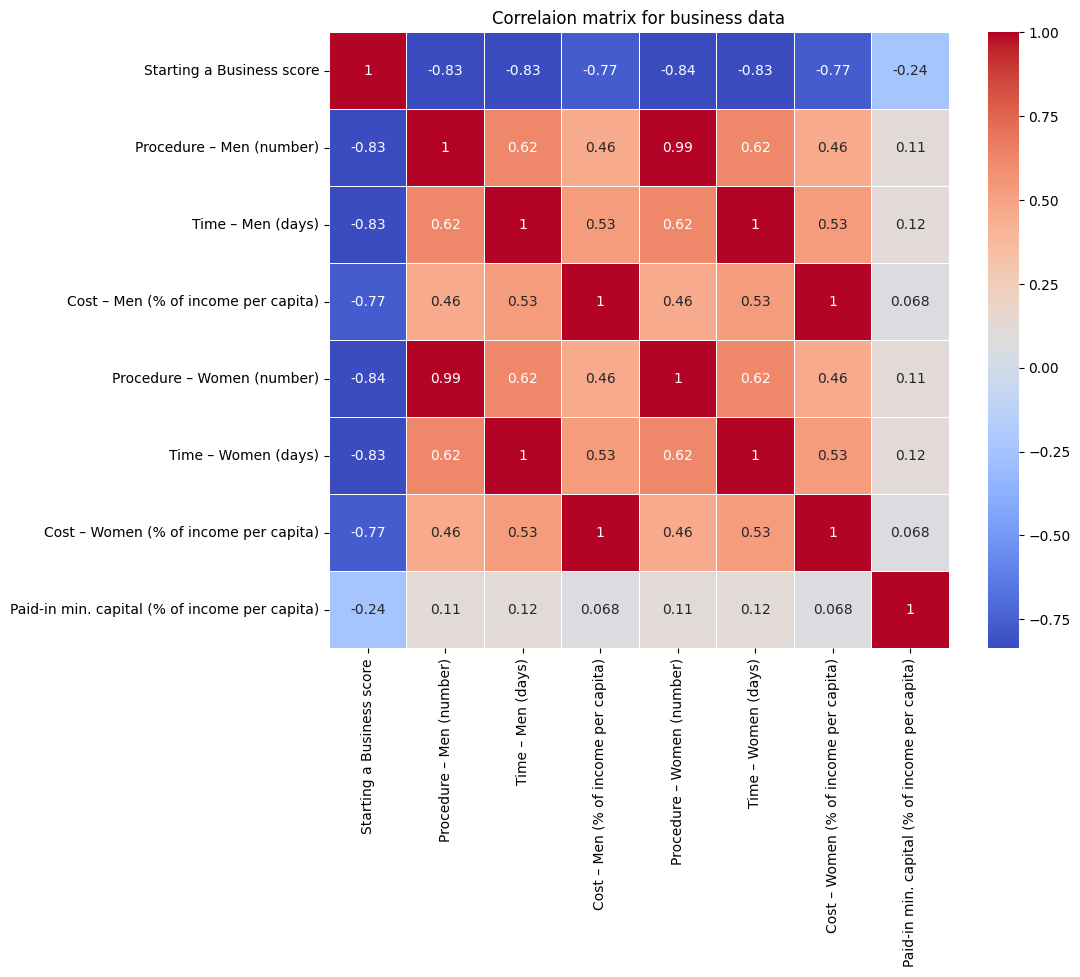

In [85]:
# plot the heatmap of correlation matrix between some columns
selected_columns = [
    'Starting a Business score',
    'Procedure – Men (number)',
    'Time – Men (days)',
    'Cost – Men (% of income per capita)',
    'Procedure – Women (number)',
    'Time – Women (days)',
    'Cost – Women (% of income per capita)',
    'Paid-in min. capital (% of income per capita)'
    ]

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlaion matrix for business data')
plt.show()

*Starting a business score tends to act opposite to the other variables. This means that those variables take less time, process or capital to start a business, while the paid-in min. capital has less likely correlation with the business score.*

---



# **3. Conclusion**

*1. The lowest GNI is 280 and the highest is 156,283.*

*2. The majority of score is between 85 and 95.*

*3. The majority is between 85 and 95.*

*4. The higher the income, the higher the starting a business score is.*

*5. Starting a business score tends to act opposite to the other variables. This means that those variables take less time, process or capital to start a business, while the paid-in min. capital has less likely correlation with the business score.*

---

